# Segregation Thresholds Experiment (LA_A)

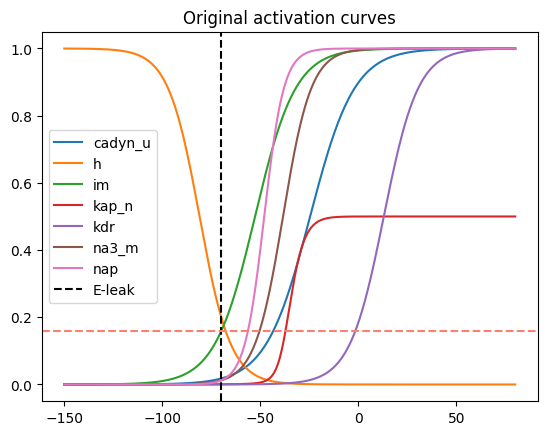

In [1]:
spiking_cutoff_shift = 50
bursting_cutoff_shift = 40

import numpy as np
import matplotlib.pyplot as plt

def vtrap(x, y):
    if np.any(np.abs(x / y) < 1e-6):
        return y * (1 - x / y / 2)
    else:
        return x / (np.exp(x / y) - 1)

#CADYN
def cadyn_u(v):
    return 1/(np.exp(-(v+24.6)/11.3)+1)

def cadyn_z(v):
    return 1/(np.exp((v+12.6)/18.9)+1)

#H
def h(v):
    return 1/(1 + np.exp(-(v+81)/-8))

#IM
def im(v):
    return 1 / ( 1 + np.exp( ( - v - 52.7 ) / 10.34 ) )

#LEAK

#KAP
def kap_l(v):
    return 1 / ( 1 + np.exp( ( - v - 56 ) / (-8.738) ) )

def kap_n(v):
    zeta=-2.5/(1+np.exp((v+40)/5))
    alpn = np.exp(1.e-3*zeta*(v-11)*9.648e4/(8.315*(273.16+31))) 
    return 1/(1 + alpn)

#KDR
def kdr(v):
    return 1 / ( 1 + np.exp( ( - v + 13 ) / 8.738 ) )

#NA3
def na3_m(v):
    return 1 / ( 1 + np.exp( ( - v - 38.43 ) / 7.2 ) )

def na3_h(v):
    return 1 / ( 1 + np.exp( ( v + 50 ) / 4 ) )

#NAP
def nap(v):
    return 1 / ( 1 + np.exp( ( - v - 48 ) / 5 ) )

v = np.linspace(-150, 80, 1000)

for func, func_name in zip([cadyn_u, h, im, kap_n, kdr, na3_m, nap], ["cadyn_u", "h", "im", "kap_n", "kdr", "na3_m", "nap"]):
    plt.plot(v, func(v), label = func_name)

plt.title("Original activation curves")
plt.axvline(-70, color = 'black', ls = '--', label = "E-leak")
plt.axhline(0.16, color = 'salmon', ls = '--')
plt.legend()



In [2]:
"""from act.data_processing import ACTDataProcessor as dp

target_folder = "./original_LAA"

target_cell = ACTCellModel(
    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/orig/template.hoc",
    path_to_mod_files="/home/ubuntu/ACT/data/LAA/orig/modfiles",
    cell_name="Cell_A",
    passive=[],
    active_channels=["gbar_nap",
                    "gmbar_im", 
                    "gbar_na3",
                    "gkdrbar_kdr", 
                    "gcabar_cadyn", 
                    "gsAHPbar_sAHP", 
                    "gkabar_kap",
                    "ghdbar_hd",
                    "glbar_leak"]
)


sim_par= SimulationParameters(
            h_v_init=-65.0,  # Consistent with nrngui settings
            h_tstop=1000,     # Simulation time in ms
            h_dt=0.1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
                ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)],
            set_g_to=[]
        )

# Set simulations
simulator = ACTSimulator(output_folder_name = ".")

# LTO
for sim_idx, amp_value in enumerate([0.04, 0.045, 0.05, 0.055, 0.06]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 800, delay = 100, lto_hto = 1)])

    simulator.submit_job(target_cell, sim_params)
    
# Normal
for sim_idx, amp_value in enumerate([0.0, 0.1, 0.2, 0.3, 0.4]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx+5, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 800, delay = 100, lto_hto = 0)])
    
    simulator.submit_job(target_cell, sim_params)

#HTO
for sim_idx, amp_value in enumerate([4.5, 5.0, 5.5, 6.0, 6.5]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx+10, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 800, delay = 100, lto_hto = 1)])

    simulator.submit_job(target_cell, sim_params)
    
simulator.run_jobs(15)

dp.combine_data(target_folder)
"""

'from act.data_processing import ACTDataProcessor as dp\n\ntarget_folder = "./original_LAA"\n\ntarget_cell = ACTCellModel(\n    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/orig/template.hoc",\n    path_to_mod_files="/home/ubuntu/ACT/data/LAA/orig/modfiles",\n    cell_name="Cell_A",\n    passive=[],\n    active_channels=["gbar_nap",\n                    "gmbar_im", \n                    "gbar_na3",\n                    "gkdrbar_kdr", \n                    "gcabar_cadyn", \n                    "gsAHPbar_sAHP", \n                    "gkabar_kap",\n                    "ghdbar_hd",\n                    "glbar_leak"]\n)\n\n\nsim_par= SimulationParameters(\n            h_v_init=-65.0,  # Consistent with nrngui settings\n            h_tstop=1000,     # Simulation time in ms\n            h_dt=0.1,      # Time step in ms\n            h_celsius=6.3,   # Temperature in degrees Celsius\n            CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),\n                ConstantCurren

In [3]:
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.segregation import ACTSegregator
from act.act_types import SimulationParameters, ConstantCurrentInjection

import matplotlib.pyplot as plt
import numpy as np

segregator = ACTSegregator()
segregated_spiking_values = segregator.segregate_with_cutoff_shift(v, [na3_m(v), kdr(v)], v_cutoff_shift=spiking_cutoff_shift)
segregated_bursting_values = segregator.segregate_with_cutoff_shift(v, [cadyn_u(v), im(v), kap_n(v), nap(v)], v_cutoff_shift=bursting_cutoff_shift)
segregated_passive_values = segregator.segregate_with_cutoff_shift(v, [h(v)], p_cutoff = 0.19, on_the_right = False)

--No graphics will be displayed.


Providing the values for the linear component of the activation curve

        :Segregation
        if (v < 1.459) {
        replace_with_var_name = 0.498 * v + 0.269
        }
        if (v < -0.541) {
        replace_with_var_name = 0
        }
        

        :Segregation
        if (v < 1.459) {
        replace_with_var_name = 0.103 * v + 0.056
        }
        if (v < -0.541) {
        replace_with_var_name = 0
        }
        
Providing the values for the linear component of the activation curve

        :Segregation
        if (v < -27.88) {
        replace_with_var_name = 0.213 * v + 6.362
        }
        if (v < -29.88) {
        replace_with_var_name = 0
        }
        

        :Segregation
        if (v < -27.88) {
        replace_with_var_name = 0.458 * v + 13.687
        }
        if (v < -29.88) {
        replace_with_var_name = 0
        }
        

        :Segregation
        if (v < -27.88) {
        replace_with_var_name = 0.212 * v + 6.329
        }
     

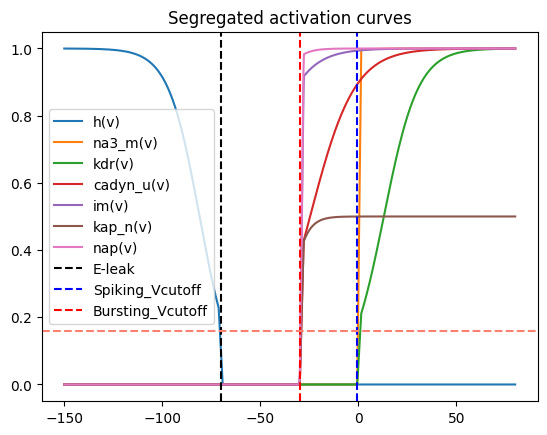

In [4]:

for idx, (ac, ac_name) in enumerate(zip(segregated_passive_values, ["h(v)"])):
    plt.plot(v, ac[0], label = ac_name)

for idx, (ac, ac_name) in enumerate(zip(segregated_spiking_values, ["na3_m(v)", "kdr(v)"])):
    plt.plot(v, ac[0], label = ac_name)


for idx, (ac, ac_name) in enumerate(zip(segregated_bursting_values, ["cadyn_u(v)", "im(v)", "kap_n(v)", "nap(v)"])):
    plt.plot(v, ac[0], label = ac_name)


plt.title("Segregated activation curves")
plt.axvline(-70, color = 'black', ls = '--', label = "E-leak")
plt.axvline(segregated_spiking_values[0][1], color = 'blue', ls = '--',label = "Spiking_Vcutoff")
plt.axvline(segregated_bursting_values[0][1], color = 'red', ls = '--',label = "Bursting_Vcutoff")
plt.axhline(0.16, color = 'salmon', ls = '--')
plt.legend()

In [5]:

# [curve, v_cutoff, linear_start_v, linear_slope, linear_intercept]
lin_cutoff_na3=segregated_spiking_values[0][2]
v_cutoff_na3=segregated_spiking_values[0][1]
slope_na3=segregated_spiking_values[0][3]
intercept_na3=segregated_spiking_values[0][4]

lin_cutoff_kdr=segregated_spiking_values[1][2]
v_cutoff_kdr=segregated_spiking_values[1][1]
slope_kdr=segregated_spiking_values[1][3]
intercept_kdr=segregated_spiking_values[1][4]

# ["cadyn_u(v)", "im(v)", "kap_n(v)", "nap(v)"]

lin_cutoff_cadyn_u=segregated_bursting_values[0][2]
v_cutoff_cadyn_u=segregated_bursting_values[0][1]
slope_cadyn_u=segregated_bursting_values[0][3]
intercept_cadyn_u=segregated_bursting_values[0][4]

lin_cutoff_im=segregated_bursting_values[1][2]
v_cutoff_im=segregated_bursting_values[1][1]
slope_im=segregated_bursting_values[1][3]
intercept_im=segregated_bursting_values[1][4]

lin_cutoff_kap_n=segregated_bursting_values[2][2]
v_cutoff_kap_n=segregated_bursting_values[2][1]
slope_kap_n=segregated_bursting_values[2][3]
intercept_kap_n=segregated_bursting_values[2][4]

lin_cutoff_nap=segregated_bursting_values[3][2]
v_cutoff_nap=segregated_bursting_values[3][1]
slope_nap=segregated_bursting_values[3][3]
intercept_nap=segregated_bursting_values[3][4]

lin_cutoff_h=segregated_passive_values[0][2]
v_cutoff_h=segregated_passive_values[0][1]
slope_h=segregated_passive_values[0][3]
intercept_h=segregated_passive_values[0][4]
 
mod_file_vars = ["na3.lincutoff",
        "na3.vcutoff",
        "na3.slope",
        "na3.intercept",
        "kdr.lincutoff",
        "kdr.vcutoff",
        "kdr.slope",
        "kdr.intercept",
        "cadyn.lincutoff",
        "cadyn.vcutoff",
        "cadyn.slope",
        "cadyn.intercept",
        "im.lincutoff",
        "im.vcutoff",
        "im.slope",
        "im.intercept",
        "kap.lincutoff",
        "kap.vcutoff",
        "kap.slope",
        "kap.intercept",
        "nap.lincutoff",
        "nap.vcutoff",
        "nap.slope",
        "nap.intercept",
        "hd.lincutoff",
        "hd.vcutoff",
        "hd.slope",
        "hd.intercept"]

names = ["lincutoff_na3",
        "vcutoff_na3",
        "slope_na3",
        "intercept_na3",
        "lincutoff_kdr",
        "vcutoff_kdr",
        "slope_kdr",
        "intercept_kdr",
        "lincutoff_cadyn",
        "vcutoff_cadyn",
        "slope_cadyn",
        "intercept_cadyn",
        "lincutoff_im",
        "vcutoff_im",
        "slope_im",
        "intercept_im",
        "lincutoff_kap",
        "vcutoff_kap",
        "slope_kap",
        "intercept_kap",
        "lincutoff_nap",
        "vcutoff_nap",
        "slope_nap",
        "intercept_nap",
        "lincutoff_hd",
        "vcutoff_hd",
        "slope_hd",
        "intercept_hd"]
values = [lin_cutoff_na3,
        v_cutoff_na3,
        slope_na3,
        intercept_na3,
        lin_cutoff_kdr,
        v_cutoff_kdr,
        slope_kdr,
        intercept_kdr,
        lin_cutoff_cadyn_u,
        v_cutoff_cadyn_u,
        slope_cadyn_u,
        intercept_cadyn_u,
        lin_cutoff_im,
        v_cutoff_im,
        slope_im,
        intercept_im,
        lin_cutoff_kap_n,
        v_cutoff_kap_n,
        slope_kap_n,
        intercept_kap_n,
        lin_cutoff_nap,
        v_cutoff_nap,
        slope_nap,
        intercept_nap,
        lin_cutoff_h,
        v_cutoff_h,
        slope_h,
        intercept_h]

for i in range(len(names)):
    print(f"{names[i]}={values[i]}")


lincutoff_na3=1.459
vcutoff_na3=-0.541
slope_na3=0.498
intercept_na3=0.269
lincutoff_kdr=1.459
vcutoff_kdr=-0.541
slope_kdr=0.103
intercept_kdr=0.056
lincutoff_cadyn=-27.88
vcutoff_cadyn=-29.88
slope_cadyn=0.213
intercept_cadyn=6.362
lincutoff_im=-27.88
vcutoff_im=-29.88
slope_im=0.458
intercept_im=13.687
lincutoff_kap=-27.88
vcutoff_kap=-29.88
slope_kap=0.212
intercept_kap=6.329
lincutoff_nap=-27.88
vcutoff_nap=-29.88
slope_nap=0.491
intercept_nap=14.672
lincutoff_hd=-71.189
vcutoff_hd=-69.189
slope_hd=-0.112
intercept_hd=-7.727


In [6]:
#spiking_cutoff_shift = 50
#bursting_cutoff_shift = 50

from act.data_processing import *
import numpy as np
import matplotlib.pyplot as plt
from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.segregation import ACTSegregator
from act.act_types import SimulationParameters, ConstantCurrentInjection

sim_folder = f"./seg_{spiking_cutoff_shift}_{bursting_cutoff_shift}_LAA"

sim_cell = ACTCellModel(
    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/seg_cutoff_test/template.hoc",
    path_to_mod_files="/home/ubuntu/ACT/data/LAA/seg_cutoff_test/modfiles",
    cell_name="Cell_A_seg",
    passive=[],
    active_channels=["gbar_nap",
                    "gmbar_im", 
                    "gbar_na3",
                    "gkdrbar_kdr", 
                    "gcabar_cadyn", 
                    "gsAHPbar_sAHP", 
                    "gkabar_kap",
                    "ghdbar_hd",
                    "glbar_leak"]
)

# Set simulations
simulator = ACTSimulator(output_folder_name = "output")



CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
    ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
    ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
    ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)]


#CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1)]

for i in range(len(CI)):
    specific_sim_cell = ACTCellModel(
        cell_name=sim_cell.cell_name,
        path_to_hoc_file=sim_cell.path_to_hoc_file,
        path_to_mod_files=sim_cell.path_to_mod_files,
        passive=sim_cell.passive,
        active_channels=sim_cell.active_channels
    )
    
    specific_sim_cell.set_g_bar(names,values)
    
    sim_params = SimulationParameters(
                    sim_name=sim_folder,
                    sim_idx=i,
                    h_v_init=-65.0, 
                    h_tstop=1000,    
                    h_dt=0.1,      
                    h_celsius=6.3,   
                    CI=[CI[i]]
                )
    
    simulator.submit_job(specific_sim_cell, sim_params)
    
simulator.run_jobs(len(CI))

combine_data("output/" + sim_folder)


        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459attr: lincutoff_na3, val: 1.459

attr: lincutoff_na3, val: 1.459
attr: lincutoff_na3, val: 1.459


attr: lincutoff_na3, val: 1.459

attr: vcutoff_na3, val: -0.541attr: vcutoff_na3, val: -0.541
attr: vcutoff_na3, val: -0.541
attr: vcutoff_na3, val: -0.541attr: vcutoff_na3, val: -0.541attr: lincutoff_na3, val: 1.459attr: vcutoff_na3, val: -0.541
attr: vcutoff_na3, val: -0.541


attr: vcutoff_na3, val: -0.541attr: lincutoff_na3, val: 1.459

attr: vcutoff_na3, val: -0.541attr: vcutoff_na3, val: -0.541
attr: lincutoff_na3, val: 1.459
attr: vcutoff_na3, val: -0.541
attr: slope_na3, val: 0.498attr: slope_na3, val: 0.498
attr: slope_na3, val: 0.4

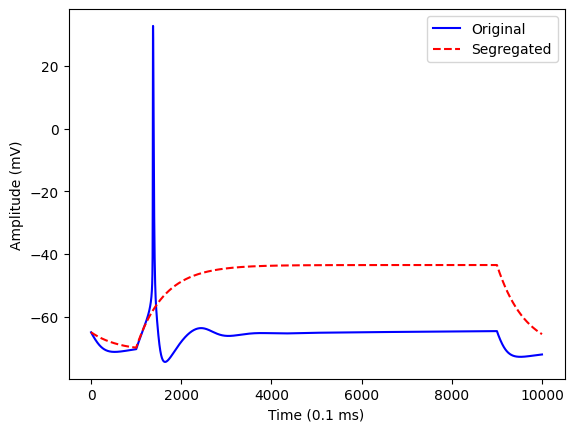

In [7]:
import numpy as np
import matplotlib.pyplot as plt

orig_out = np.load(f"./output/original_LAA/out_6.npy")
seg_out = np.load(f"./output/seg_{spiking_cutoff_shift}_{bursting_cutoff_shift}_LAA/out_6.npy")

plt.plot(orig_out[:, 0], label = "Original", c = 'blue')
plt.plot(seg_out[:, 0], label = "Segregated", ls = '--', c = 'red')
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (0.1 ms)")
plt.legend()